<a href="https://colab.research.google.com/github/Bstrutt/Moonboard-Analysis/blob/main/Moonboard_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [24]:
!pip install requests_html
import requests
from requests_html import HTMLSession
from json import JSONDecoder
import pandas as pd


  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


### Helper Functions 

In [25]:
#This function taken directly from here: https://stackoverflow.com/questions/54235528/how-to-find-json-object-in-text-with-python
def extract_json_objects(text, decoder=JSONDecoder()):
    pos = 0
    while True:
        match = text.find('{', pos)
        if match == -1:
            break
        try:
            result, index = decoder.raw_decode(text[match:])
            return result
            pos = match + index
        except ValueError:
            pos = match + 1

In [26]:
def column(letter):
    if letter == 'A':
      return 0
    elif letter == 'B':
      return 1
    elif letter == 'C':
      return 2
    elif letter == 'D':
      return 3
    elif letter == 'E':
      return 4
    elif letter == 'F':
      return 5
    elif letter == 'G':
      return 6
    elif letter == 'H':
      return 7
    elif letter == 'I':
      return 8
    elif letter == 'J':
      return 9
    elif letter == 'K':
      return 10
    elif letter == 'L':
      return 11

In [27]:
def boardify(locationsList, typeList):
  board = [[0 for i in range(11)] for j in range(18)]
  for (loc, typ) in zip(locationsList, typeList):
    col = column(loc[0])
    row = 18 - int(loc[1:])
    board[row][col] = typ
  return board
  

In [28]:
def getBinaryBoard(board):
  binBoard = [[0 for i in range(11)] for j in range(18)]
  for i in range(0,len(board)):
    for j in range(len(board[i])):
      if board[i][j] != 0:
        binBoard[i][j] = 1
      else:
        binBoard[i][j] = 0
  return binBoard


In [29]:
def getCoords(locList):
  coords = []
  for loc in locList:
    col = column(loc[0])
    row = 18 - int(loc[1:])
    coords.append((row, col))
  return coords

### Scraping and dataframing

Our eventual output is a dataframe called 'routesDf'

The URL callouts can take a bit, usually around 3 minutes.

In [30]:
BASE = 'https://www.moonboard.com'
path = ''

session = HTMLSession()

In [31]:
routeJsons = []
file = open('benchmarkPaths', 'r')
Lines = file.readlines()

for line in Lines:
  url = BASE + line[:-1]
  response = session.get(url)
  text = response.text
  routeJsons.append(extract_json_objects(text))
routeJsons = routeJsons[:-1]

In [32]:
#Trying to test which of these is faster
grades = []
locations = []
holds = []
names = []
for route in routeJsons:
  grades.append(route['Grade'])
  names.append(route['Name'])
  locationDescriptions = []
  holdTypes = []
  for loc in route['Locations']:
    locationDescriptions.append(loc['Description'])
    holdTypes.append(loc['Type'])
  locations.append(locationDescriptions)
  holds.append(holdTypes)

In [33]:
routesDf = pd.DataFrame()

routesDf.insert(0, 'Name', names)
routesDf.insert(1, 'Grade', grades)
routesDf.insert(2, 'Locations', locations)
routesDf.insert(3, 'Hold Types', holds)


### EDA

A simple look at our data now that it's processed.

In [45]:
routesDf

,Name,Grade,Locations,Hold Types,Full Board,Binary Board,Location Coords
0,BLACK BEAUTY,8B,"[E14, H18, I9, J5]","[2, 3, 2, 1]","[[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, ...","[(4, 4), (0, 7), (9, 8), (13, 9)]"
1,PROJECT 2,8A+,"[A16, A18, D10, H14, K6, K7]","[2, 3, 2, 2, 1, 2]","[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[(2, 0), (0, 0), (8, 3), (4, 7), (12, 10), (11..."
2,SHATTERED MERCY,8A+,"[B4, C18, D3, G7, H15, H14, I8, K12]","[1, 3, 1, 2, 2, 2, 2, 2]","[[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[(14, 1), (0, 2), (15, 3), (11, 6), (3, 7), (4..."
3,ATTIC ADDICT,8A,"[A18, E6, F16, F15, F8, G2, J12, J6]","[3, 1, 2, 2, 2, 1, 2, 2]","[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[(0, 0), (12, 4), (2, 5), (3, 5), (10, 5), (16..."
4,BUNNY,8A,"[B4, G7, G16, H18, H7, K8, K10, K13]","[1, 2, 2, 3, 2, 2, 2, 2]","[[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, ...","[(14, 1), (11, 6), (2, 6), (0, 7), (11, 7), (1..."
...,...,...,...,...,...,...,...
442,WARM UP NO. 8,6B+,"[E18, F13, F5, I10, I16, J12, J8]","[3, 2, 1, 2, 2, 2, 2]","[[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[(0, 4), (5, 5), (13, 5), (8, 8), (2, 8), (6, ..."
443,WUTHERING HEIGHTS,6B+,"[E15, E18, F5, G13, I11, J8, K11]","[2, 3, 1, 2, 2, 2, 2]","[[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[(3, 4), (0, 4), (13, 5), (5, 6), (7, 8), (10,..."
444,YAYABLACK,6B+,"[C13, D18, D15, E8, H10, H5, J7, J5]","[2, 3, 2, 2, 2, 1, 2, 1]","[[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[(5, 2), (0, 3), (3, 3), (10, 4), (8, 7), (13,..."
445,YOU GET A CAR,6B+,"[A9, C13, D12, E8, F14, F5, G14, G18, K5]","[2, 2, 2, 2, 2, 2, 2, 3, 1]","[[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, ...","[(9, 0), (5, 2), (6, 3), (10, 4), (4, 5), (13,..."


A view of what a route looks like when it's on the wall. You can see the route here: https://www.moonboard.com/Problems/View/62575/project-2

0 = hold not included

1 = start

2 = default hold

3 = finish

In [35]:
routesDf['Full Board'] = ''
routesDf['Binary Board'] = ''
routesDf['Location Coords'] = ''
for i in routesDf.index:
  routesDf.at[i, 'Full Board'] = boardify(routesDf.at[i, 'Locations'], routesDf.at[i, 'Hold Types'])
  routesDf.at[i, 'Binary Board'] = getBinaryBoard(routesDf.at[i, 'Full Board'])
  routesDf.at[i, 'Location Coords'] = getCoords(routesDf.at[i, 'Locations'])

A look at our distribution of grades, because we have so little data at the higher end of our grades we will likely have trouble predicting in this area. Hopefully we'll still be able to predict the lower and middle ends of grades.

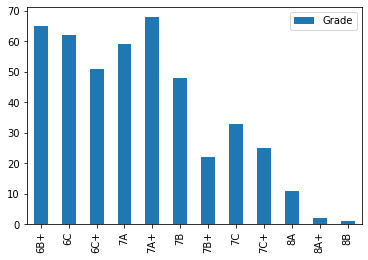

In [36]:
routesDf['Grade'].value_counts().to_frame().sort_index().plot(kind='bar')

### Feature Engineering

In [37]:
import math
def getCoordinateDistance(A, B):
  return abs(math.sqrt((A[0] - B[0])**2 + (A[1] - B[1])**2))


In [76]:
def averageSource(sourceCoords):
  if len(sourceCoords) > 2 or len(sourceCoords) < 1:
    raise ValueError
  elif len(sourceCoords) == 1:
    return sourceCoords[0]
  else:
    sourceAverage = ((sourceCoords[0][0] + sourceCoords[1][0])/2, (sourceCoords[0][1] + sourceCoords[1][1])/2)
  return sourceAverage

In [56]:
def getSource(route):
  vertices = []
  for i in range(len(route['Hold Types'])):
    if route['Hold Types'][i] == 1:
      vertices.append(route['Location Coords'][i])
  return vertices

In [57]:
def getPath(route):
  vertices = []
  for i in range(len(route['Hold Types'])):
    if route['Hold Types'][i] == 2:
      vertices.append(route['Location Coords'][i])
  return vertices

In [39]:
def getSinks(route):
  sink = []
  for i in range(len(route['Hold Types'])):
    if route['Hold Types'][i] == 3:
      sink.append(route['Location Coords'][i])
  return sink

In [158]:
#This is gonna be sloppy but here's what's going on, we have a modified Dijksta's
#We have tuples that are used in place of actual objects. (let's say it's because of speed)
#the tuples should have been lists but it made more sense in my head to make them tuples at the time
#Really, seriously, they should just be classes.
#The first value is the x coordinate, the second is the y coordinate
#The third value is the dist value and the second is the prev value
def modifiedDijkstra(sourceCoords, pathCoords, finishCoords):
  path = []
  sourceAverage = averageSource(sourceCoords)

  vertices = pathCoords + finishCoords
  
  #Set Dijkstra up 
  
  for v in range(len(vertices)):
    if vertices[v] != sourceAverage:
      vertices[v] = vertices[v] + (1000, None)
  sourceAverage = sourceAverage + (0, None)

  vertices.append(sourceAverage)

  while (len(vertices)) > 0:
    min = (0,0,1001,0)
    
    #Finding Shortest dist and removing 
    for v in range(len(vertices)):
      if vertices[v][2] < min[2]:
        min = vertices[v]
      print(min)

    path.append(min)
    vertices.remove(min)

    print(vertices)
    for v in range(len(vertices)):
      
      alt = min[2] + getCoordinateDistance(min,vertices[v])
      #print(alt)
      if alt < vertices[v][2]:

        #Gotta make the tuple a list
        tempVert = list(vertices[v])
        tempVert[2] = alt
        tempVert[3] = min[0:2]
        vertices[v] = tuple(tempVert)

  return path

In [133]:
def getHoldPath(route):

  source = getSource(route)
  path = getPath(route)
  sink = getSinks(route)

  return modifiedDijkstra(source, path, sink)

In [142]:
r = routesDf.iloc[1]

In [146]:
r

Name                                                       PROJECT 2
Grade                                                            8A+
Locations                               [A16, A18, D10, H14, K6, K7]
Hold Types                                        [2, 3, 2, 2, 1, 2]
Full Board         [[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...
Binary Board       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...
Location Coords    [(2, 0), (0, 0), (8, 3), (4, 7), (12, 10), (11...
Name: 1, dtype: object

In [ ]:
a = getHoldPath(r)